In [1]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer


In [2]:
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#imoute missing values
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

In [4]:
df['age'].isnull().sum()

np.int64(0)

In [5]:
df['fare'].isnull().sum()

np.int64(0)

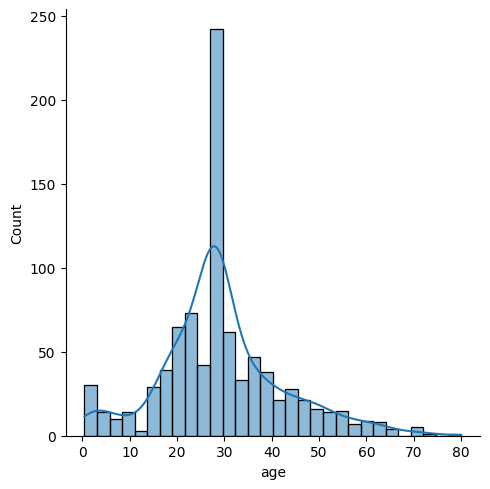

In [13]:
sns.displot(df['age'],kde=True)

In [19]:
    # age discretization
    age_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
    age_discretizer.fit(df[['age']])
    df['age_discretized'] = age_discretizer.transform(df[['age']])
    df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_discretized
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0


<Axes: xlabel='age', ylabel='Count'>

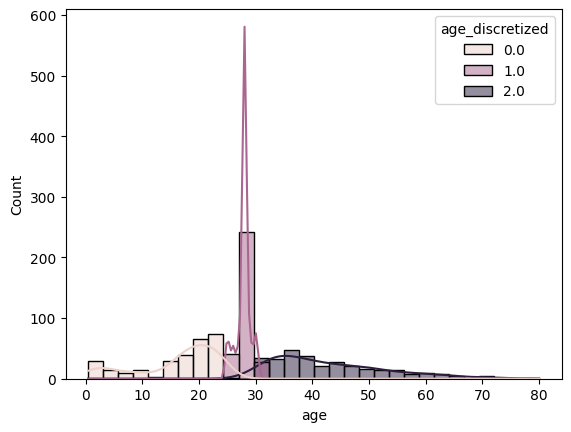

In [20]:
sns.histplot(df,x='age',hue='age_discretized',kde=True)